# Describing and visualising

1) Looking at the cleaned data in .../data/preprocessed/modelling_data/final/, we want to see

* Total number of words
* Total number of unique words

2) Code for figure 1, A1-B1 in the paper (performance of best model vs benchmarks)

In [4]:
directory_path = "/Users/pbrams/Desktop/AARHUS_UNIVERSITY/kandidat/data_sci/data_sci_project/predicting_manifesto_alignment"

In [ ]:
import pandas as pd

# Get data
incomplete = pd.read_csv(f"{directory_path}/data/preprocessed/modelling_data/temp/incomplete_dates_1997_2022.csv").drop(columns = ['Unnamed: 0'])
complete = pd.read_csv(f"{directory_path}/data/preprocessed/modelling_data/temp/complete_dates_1997_2022.csv").drop(columns = ['Unnamed: 0'])

In [ ]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from collections import Counter

# Ensure nltk has the required tokenizer data
nltk.download('punkt')

# Ensure datetime format
incomplete['Date'] = pd.to_datetime(incomplete['Date'])

# Tokenize and count total and unique words
def count_words(text):
    tokens = word_tokenize(text.lower())  # Convert to lower case for case insensitive counting
    return len(tokens), len(set(tokens))

print("Applying function to processed text....")

# Apply the function to the processed_text column
incomplete[['total_word_count', 'unique_word_count']] = incomplete['processed_text'].apply(lambda x: pd.Series(count_words(x)))

print("Summarising...")

# Summarize the total number of words and unique words
total_words = incomplete['total_word_count'].sum()
unique_words = len(set(word_tokenize(' '.join(incomplete['processed_text']).lower())))

print(f"Total number of words: {total_words}")
print(f"Total number of unique words: {unique_words}")

# Figure of performance

/var/folders/rp/y6c4hxp96_j_rq3k86806lgr0000gn/T/ipykernel_29251/2835340551.py:24: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=plot_df_cycle, x='Model', y='RMSE', hue='Model', dodge=False, ax=axs_cycle[0, 0], palette='viridis', legend=False, ci=None)
/var/folders/rp/y6c4hxp96_j_rq3k86806lgr0000gn/T/ipykernel_29251/2835340551.py:30: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=plot_df_cycle, x='Model', y='R2', hue='Model', dodge=False, ax=axs_cycle[0, 1], palette='viridis', legend=False, ci=None)
/var/folders/rp/y6c4hxp96_j_rq3k86806lgr0000gn/T/ipykernel_29251/2835340551.py:36: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=plot_df_cycle, x='Model', y='MSE', hue='Model', dodge=False, ax=axs_cycle[1, 0], palette='viridis', legend=False, ci=None)
/var/folders/rp/y6c4hxp96_j_rq3k86806lgr0000gn

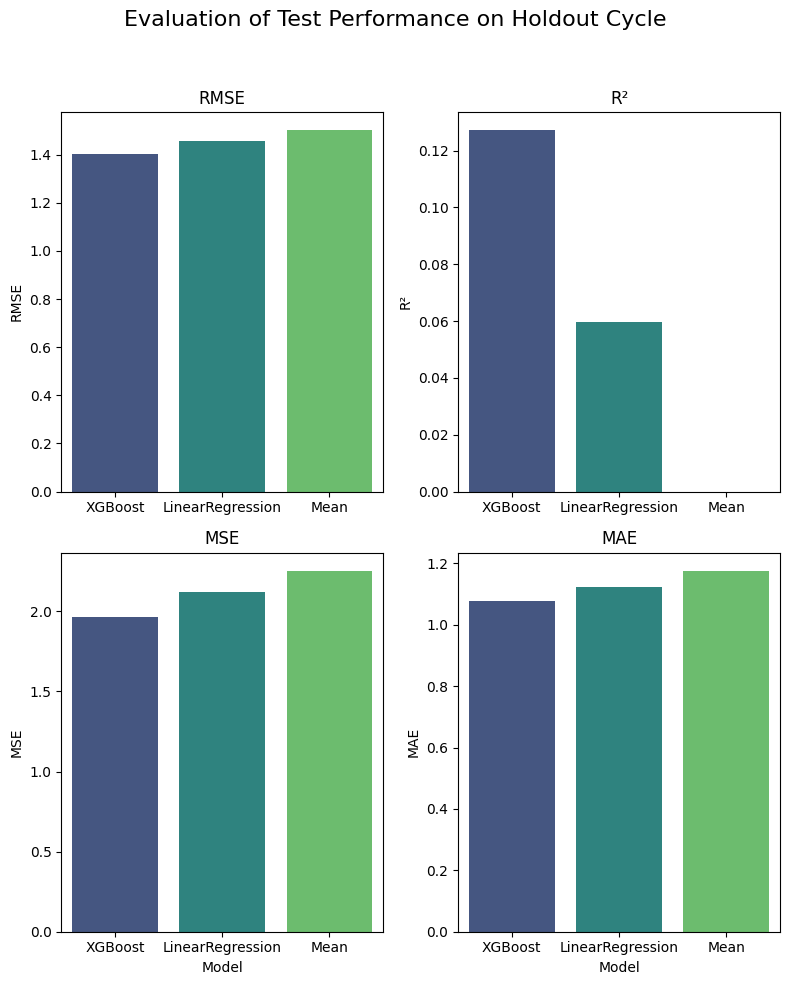

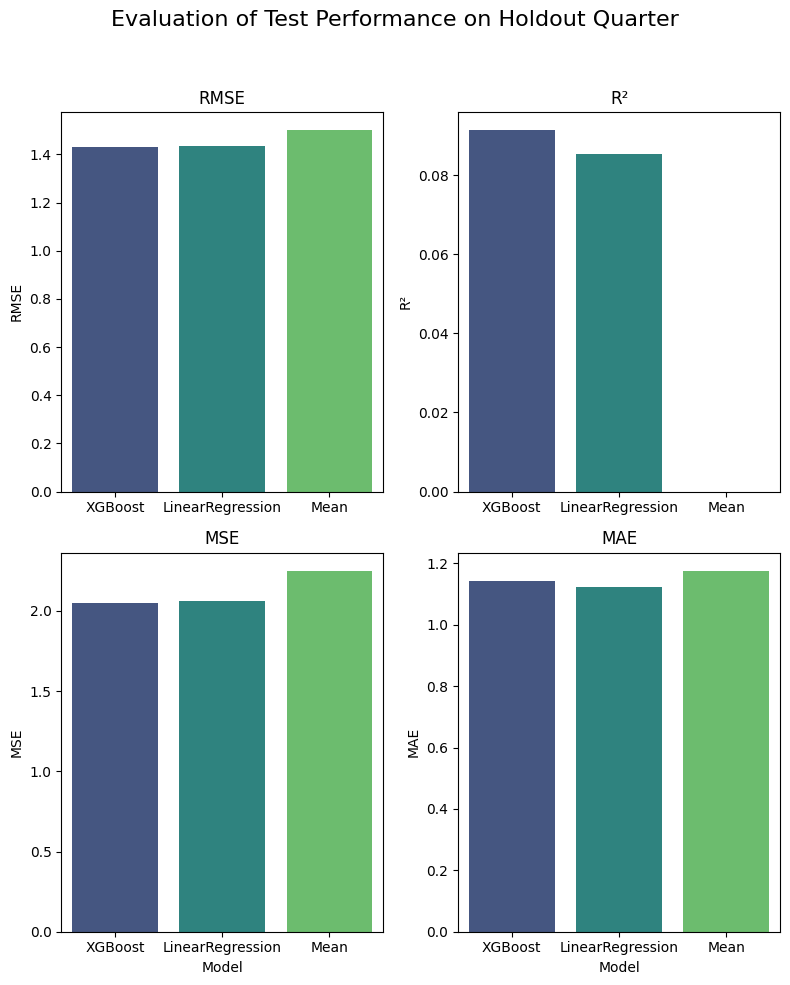

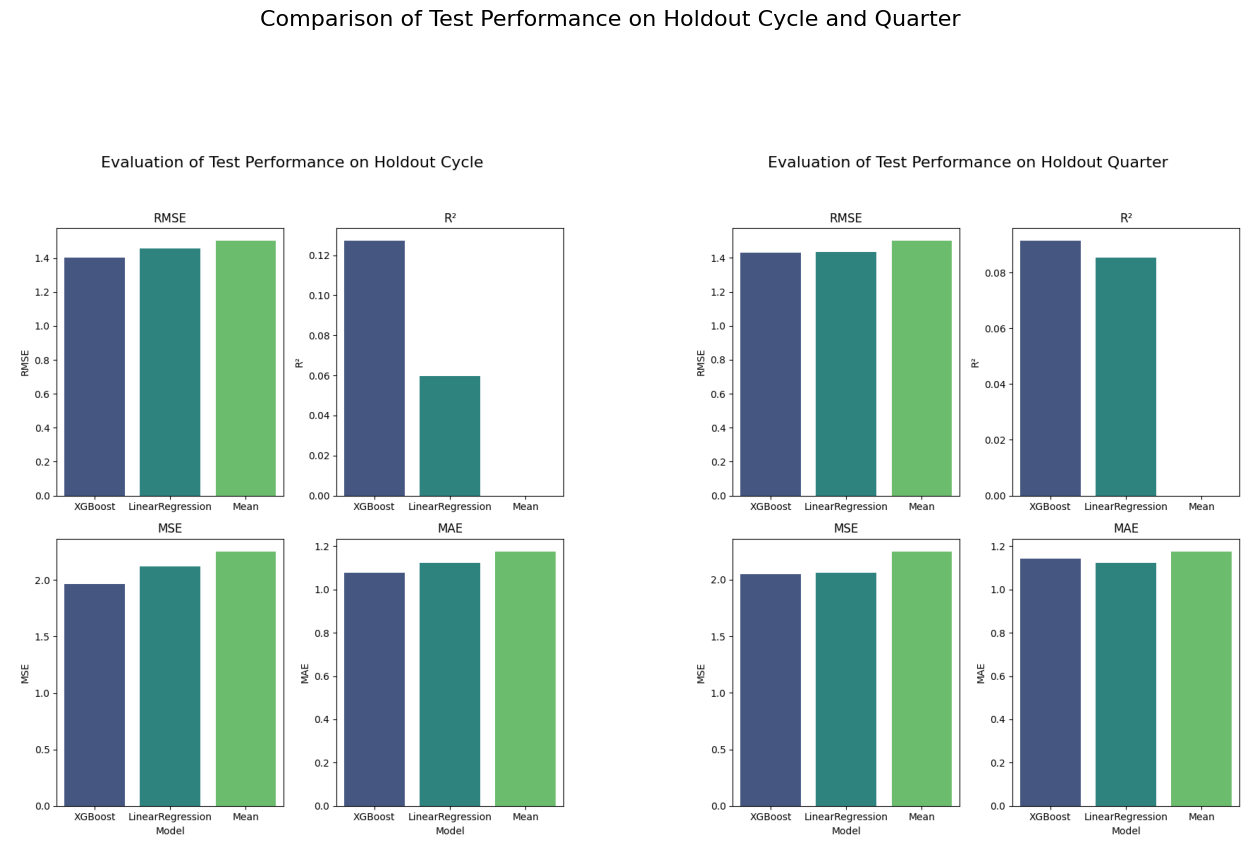

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

# Load the metrics dfs
metrics_df_cycle = pd.read_csv(f"{directory_path}/results/fits_RO_cycle/metrics_df.csv")
metrics_df_quarter = pd.read_csv(f"{directory_path}/results/fits_RO_quarter/metrics_df.csv")

# Define the models to plot
models_to_plot = ['XGBoost', 'LinearRegression', 'Mean']

# Filter the metrics dfs for the models to plot
plot_df_cycle = metrics_df_cycle[metrics_df_cycle['Model'].isin(models_to_plot)]
plot_df_quarter = metrics_df_quarter[metrics_df_quarter['Model'].isin(models_to_plot)]

# Create a figure for the holdout cycle
fig_cycle, axs_cycle = plt.subplots(2, 2, figsize=(8, 10), constrained_layout=True)

# Add a big title for the entire figure
fig_cycle.suptitle('Evaluation of Test Performance on Holdout Cycle', fontsize=16, y=0.98)

# Plot RMSE for holdout cycle
sns.barplot(data=plot_df_cycle, x='Model', y='RMSE', hue='Model', dodge=False, ax=axs_cycle[0, 0], palette='viridis', legend=False, ci=None)
axs_cycle[0, 0].set_title('RMSE')
axs_cycle[0, 0].set_ylabel('RMSE')
axs_cycle[0, 0].set_xlabel('')

# Plot R² for holdout cycle
sns.barplot(data=plot_df_cycle, x='Model', y='R2', hue='Model', dodge=False, ax=axs_cycle[0, 1], palette='viridis', legend=False, ci=None)
axs_cycle[0, 1].set_title('R²')
axs_cycle[0, 1].set_ylabel('R²')
axs_cycle[0, 1].set_xlabel('')

# Plot MSE for holdout cycle
sns.barplot(data=plot_df_cycle, x='Model', y='MSE', hue='Model', dodge=False, ax=axs_cycle[1, 0], palette='viridis', legend=False, ci=None)
axs_cycle[1, 0].set_title('MSE')
axs_cycle[1, 0].set_ylabel('MSE')
axs_cycle[1, 0].set_xlabel('Model')

# Plot MAE for holdout cycle
sns.barplot(data=plot_df_cycle, x='Model', y='MAE', hue='Model', dodge=False, ax=axs_cycle[1, 1], palette='viridis', legend=False, ci=None)
axs_cycle[1, 1].set_title('MAE')
axs_cycle[1, 1].set_ylabel('MAE')
axs_cycle[1, 1].set_xlabel('Model')

# Adjust the layout to make room for the big title
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Create a figure for the holdout quarter
fig_quarter, axs_quarter = plt.subplots(2, 2, figsize=(8, 10), constrained_layout=True)

# Add a big title for the entire figure
fig_quarter.suptitle('Evaluation of Test Performance on Holdout Quarter', fontsize=16, y=0.98)

# Plot RMSE for holdout quarter
sns.barplot(data=plot_df_quarter, x='Model', y='RMSE', hue='Model', dodge=False, ax=axs_quarter[0, 0], palette='viridis', legend=False, ci=None)
axs_quarter[0, 0].set_title('RMSE')
axs_quarter[0, 0].set_ylabel('RMSE')
axs_quarter[0, 0].set_xlabel('')

# Plot R² for holdout quarter
sns.barplot(data=plot_df_quarter, x='Model', y='R2', hue='Model', dodge=False, ax=axs_quarter[0, 1], palette='viridis', legend=False, ci=None)
axs_quarter[0, 1].set_title('R²')
axs_quarter[0, 1].set_ylabel('R²')
axs_quarter[0, 1].set_xlabel('')

# Plot MSE for holdout quarter
sns.barplot(data=plot_df_quarter, x='Model', y='MSE', hue='Model', dodge=False, ax=axs_quarter[1, 0], palette='viridis', legend=False, ci=None)
axs_quarter[1, 0].set_title('MSE')
axs_quarter[1, 0].set_ylabel('MSE')
axs_quarter[1, 0].set_xlabel('Model')

# Plot MAE for holdout quarter
sns.barplot(data=plot_df_quarter, x='Model', y='MAE', hue='Model', dodge=False, ax=axs_quarter[1, 1], palette='viridis', legend=False, ci=None)
axs_quarter[1, 1].set_title('MAE')
axs_quarter[1, 1].set_ylabel('MAE')
axs_quarter[1, 1].set_xlabel('Model')

# Adjusting the layout to make room for the big title
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Show the plots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 10))

fig.suptitle('Comparison of Test Performance on Holdout Cycle and Quarter', fontsize=16, y=0.98)

# Display cycle plot in the first subplt
fig_cycle_canvas = fig_cycle.canvas
fig_cycle_canvas.draw()
ax1.imshow(fig_cycle_canvas.buffer_rgba())
ax1.axis('off')

# Display quarter plot in the second subplt
fig_quarter_canvas = fig_quarter.canvas
fig_quarter_canvas.draw()
ax2.imshow(fig_quarter_canvas.buffer_rgba())
ax2.axis('off')

# Ensure the /figures directory exists
if not os.path.exists('figures'):
    os.makedirs('figures')

fig.savefig('figures/comparison_performance.png')

plt.show()